<a href="https://colab.research.google.com/github/maram-bakini/Diabetes-Destiny-Unraveling-the-Future-with-Precision-Prediction/blob/main/Copy_of_diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 1. Load Data

In [ ]:
data = pd.read_csv("training data.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.shape

(768, 9)

DATA SHAPE

the dataframe is made up of 768 rows and 9 features of data.

# 2. Exploratory Data Analysis Diabetes desease

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In our Dataset we have all 9 numerical features

In [ ]:
total = len(data)
print(total)
diabetic =data[data["Outcome"]==1]
print(len(diabetic))
not_diabetic =data[data["Outcome"]==0]
print(len(not_diabetic))

768
268
500


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
not_diabetic.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,500.0,109.980000,26.141200,0.000,93.00000,107.000,125.00000,197.000
BloodPressure,500.0,68.184000,18.063075,0.000,62.00000,70.000,78.00000,122.000
SkinThickness,500.0,19.664000,14.889947,0.000,0.00000,21.000,31.00000,60.000
Insulin,500.0,68.792000,98.865289,0.000,0.00000,39.000,105.00000,744.000
BMI,500.0,30.304200,7.689855,0.000,25.40000,30.050,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000
Outcome,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000


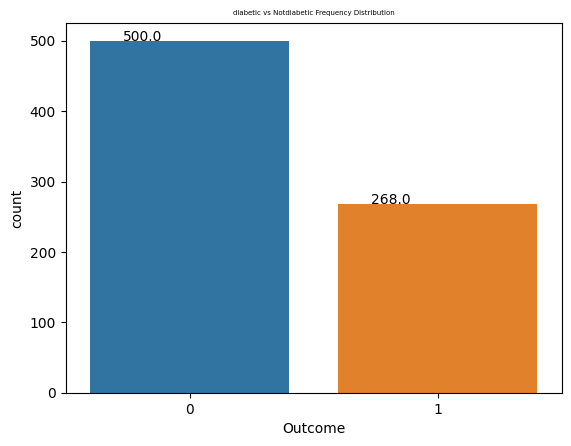

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data =data, x ='Outcome')
ax.set_title('diabetic vs Notdiabetic Frequency Distribution', fontsize=5)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()))

we did some visiualization to see how Glucose,Insulin,BMI and Age have a role in having the chronic disease in patients

<ipython-input-10-6ae928b33309>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetic['Glucose'], label = 'Glucose level for diabetic', shade = True, color = 'r')
<ipython-input-10-6ae928b33309>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(not_diabetic['Glucose'], label = 'Glucose level for non diabetic', shade = True, color = 'b')


Text(0.5, 0, 'Glucose level')

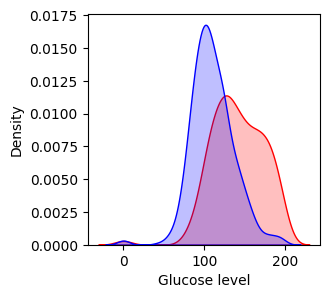

In [ ]:
plt.figure(figsize=(3,3))

sns.kdeplot(diabetic['Glucose'], label = 'Glucose level for diabetic', shade = True, color = 'r')
sns.kdeplot(not_diabetic['Glucose'], label = 'Glucose level for non diabetic', shade = True, color = 'b')

plt.xlabel('Glucose level')


<ipython-input-18-c208272aaa8e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetic['Insulin'], label = 'Insulin level for diabetic', shade = True, color = 'r')
<ipython-input-18-c208272aaa8e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(not_diabetic['Insulin'], label = 'Insulin level for non diabetic', shade = True, color = 'b')


Text(0.5, 0, 'Insulin level')

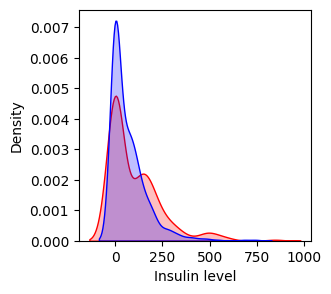

In [ ]:

plt.figure(figsize=(3,3))

sns.kdeplot(diabetic['Insulin'], label = 'Insulin level for diabetic', shade = True, color = 'r')
sns.kdeplot(not_diabetic['Insulin'], label = 'Insulin level for non diabetic', shade = True, color = 'b')

plt.xlabel('Insulin level')


<ipython-input-19-f0b6fcf2f888>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetic['BMI'], label = 'BMI level for diabetic', shade = True, color = 'r')
<ipython-input-19-f0b6fcf2f888>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(not_diabetic['BMI'], label = 'BMI level for non diabetic', shade = True, color = 'b')


Text(0.5, 0, 'BMI level')

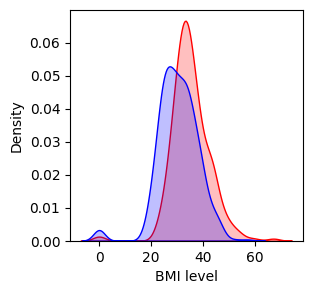

In [ ]:

plt.figure(figsize=(3,3))

sns.kdeplot(diabetic['BMI'], label = 'BMI level for diabetic', shade = True, color = 'r')
sns.kdeplot(not_diabetic['BMI'], label = 'BMI level for non diabetic', shade = True, color = 'b')

plt.xlabel('BMI level')


<ipython-input-21-2bbfcbbc40b8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetic['Age'], label = 'Age level for diabetic', shade = True, color = 'r')
<ipython-input-21-2bbfcbbc40b8>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(not_diabetic['Age'], label = 'Age level for non diabetic', shade = True, color = 'b')


Text(0.5, 0, 'Age')

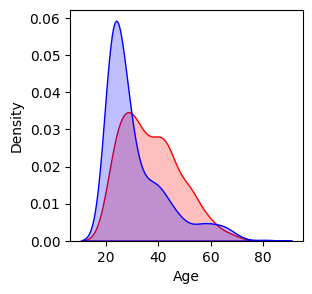

In [ ]:

plt.figure(figsize=(3,3))

sns.kdeplot(diabetic['Age'], label = 'Age level for diabetic', shade = True, color = 'r')
sns.kdeplot(not_diabetic['Age'], label = 'Age level for non diabetic', shade = True, color = 'b')

plt.xlabel('Age')


<ipython-input-22-919549d924b0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetic['SkinThickness'], label = 'SkinThickness for diabetic', shade = True, color = 'r')
<ipython-input-22-919549d924b0>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(not_diabetic['SkinThickness'], label = 'SkinThickness for non diabetic', shade = True, color = 'b')


Text(0.5, 0, 'SkinThickness')

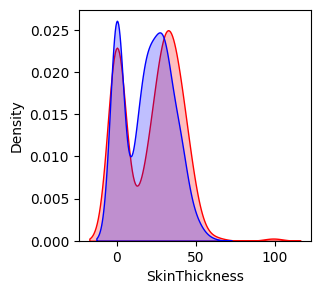

In [ ]:

plt.figure(figsize=(3,3))

sns.kdeplot(diabetic['SkinThickness'], label = 'SkinThickness for diabetic', shade = True, color = 'r')
sns.kdeplot(not_diabetic['SkinThickness'], label = 'SkinThickness for non diabetic', shade = True, color = 'b')

plt.xlabel('SkinThickness')


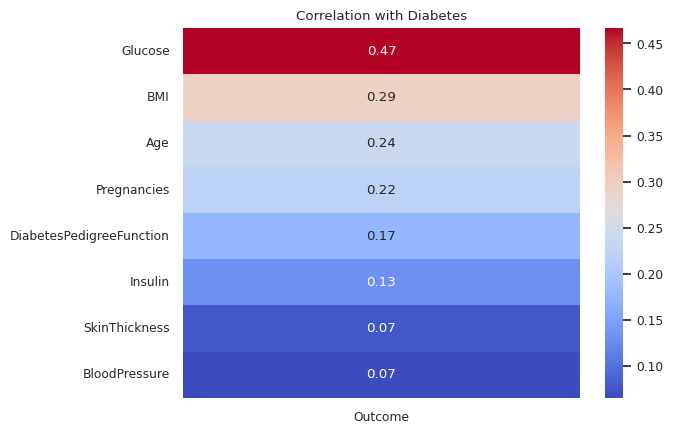

In [ ]:
#Graph I
corr = data.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

# 3. Data Preparation

In [ ]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

In [ ]:
data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Separate the features and target variable
X = data_copy.drop('Outcome', axis=1)
y = data_copy['Outcome']

# Instantiate the SMOTE oversampler
smote = SMOTE()

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Print the class distribution after balancing
print(balanced_df['Outcome'].value_counts())


1    500
0    500
Name: Outcome, dtype: int64


In [ ]:
x = balanced_df.drop(['Outcome'],axis=1)
y = balanced_df.Outcome

In [ ]:
duplicates = data_copy.duplicated()
duplicates.sum()

0

# 4. Modeling

# Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_tmp = scaler.fit_transform(x)
x = x_tmp

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='linear')

# Train the classifier using the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [ ]:
accr = []
pres = []
rec = []
f = []

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                       'weights': ['uniform', 'distance'],
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'],
                       'n_jobs':[1, -1]}

#apply exhaustice gridsearch to find the optimal solution
knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(x_train, y_train)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(knn_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))

The best parameters are:
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 7, 'weights': 'distance'}

The best model after gridsearch is:
 KNeighborsClassifier(n_jobs=1, n_neighbors=7, weights='distance')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score



clf = KNeighborsClassifier(metric='euclidean',n_neighbors=1)

k_folds = KFold(n_splits =5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.76  0.725 0.745 0.79  0.94 ]
Average CV Score:  0.792
Number of CV Scores used in Average:  5


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric='manhattan',n_neighbors=1)
knn=classifier.fit(x_train, y_train)
y_pred = knn.predict(x_test)

Confusion matrix, without normalization
[[79 26]
 [ 5 90]]


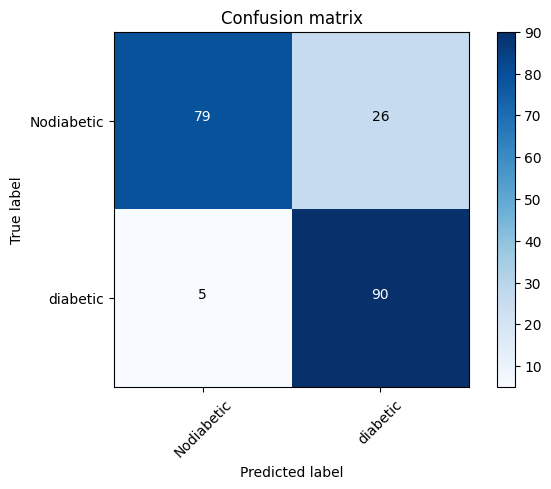

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Nodiabetic', 'diabetic'], title='Confusion matrix')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       105
           1       0.78      0.95      0.85        95

    accuracy                           0.84       200
   macro avg       0.86      0.85      0.84       200
weighted avg       0.86      0.84      0.84       200



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Create the SVM model.
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model.
svm_model.fit(x_train, y_train)

# Make predictions on the test set.
y_pred = svm_model.predict(x_test)

# Calculate the confusion matrix.
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy.
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report.
class_report = classification_report(y_test, y_pred)

# Print the results.
print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[82 23]
 [25 70]]

Accuracy: 76.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       105
           1       0.75      0.74      0.74        95

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize the XGBoost model
model = XGBClassifier()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix_result)

print("\nAccuracy:")
print(accuracy)

print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[85 20]
 [ 9 86]]

Accuracy:
0.855

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       105
           1       0.81      0.91      0.86        95

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 64), activation='logistic', random_state=0, learning_rate_init=0.03)
# Train the model
mlp.fit(x_train, y_train)

# Predict on the test set
y_pred = mlp.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.77      0.76       105
           1       0.74      0.73      0.73        95

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



# Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200,criterion='gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

Confusion matrix, without normalization
[[91 14]
 [ 8 87]]


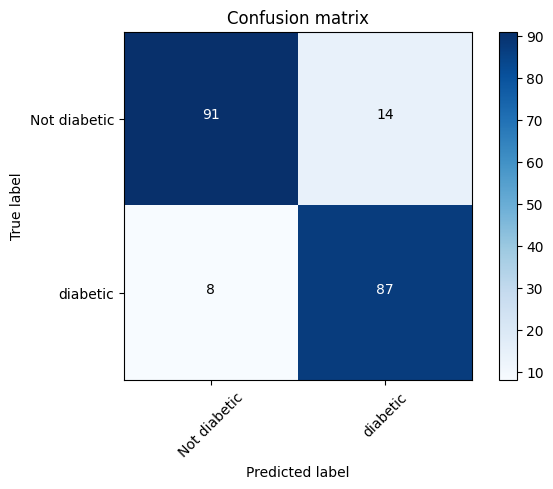

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not diabetic', 'diabetic'], title='Confusion matrix')

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       105
           1       0.86      0.92      0.89        95

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

Confusion matrix, without normalization
[[85 20]
 [29 66]]


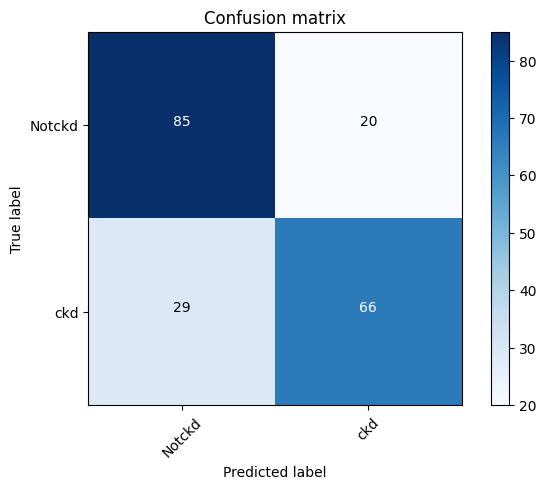

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       105
           1       0.77      0.69      0.73        95

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Notckd', 'ckd'], title='Confusion matrix')
# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


In [ ]:
gnb.save("gnb.")

Accuracy: 0.805
Confusion Matrix:
[[81 24]
 [15 80]]


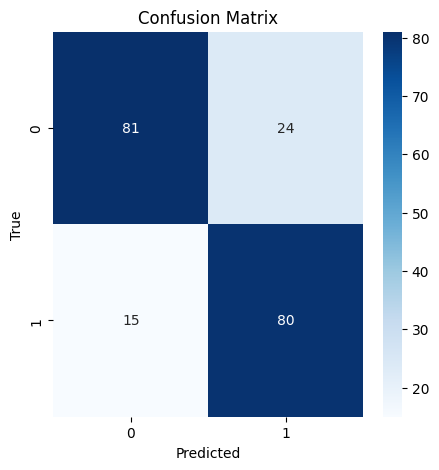

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       105
           1       0.77      0.84      0.80        95

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
